In [388]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn import preprocessing
import statistics
from sklearn.neighbors import KNeighborsRegressor


df=pd.read_csv('../données/Irish_synchrone_sample7_train.csv', sep=",")


In [389]:
y=df['mean']
X = df.loc[:,['TempMean', 'TempMin','TempMax', 'WindSpeed', 'WindSpeedMaxS','WindSpeedMaxG','Precip','Time','Posan','Instant']]


In [390]:
from sklearn.decomposition import PCA
pca=PCA()
X_pca = pca.fit_transform(preprocessing.scale(X))[:,0:5]

In [391]:
np.cumsum(np.round(pca.explained_variance_ratio_, decimals = 4)*100)[0:9]

array([ 34.84,  58.45,  74.17,  84.17,  93.05,  98.02,  99.16,  99.91,
       100.  ])

In [392]:
# X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.30,random_state=42)
# x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
limit = int(len(y)*0.8)
X_train, X_test_pca = preprocessing.scale(X_pca[:limit]), preprocessing.scale(X_pca[limit:])
y_train, y_test = preprocessing.scale(y[:limit]), preprocessing.scale(y[limit:])

X_test = preprocessing.scale(X[limit:])

In [393]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
pcr = lm.fit(X_train[:,0:6], y_train)
y_pred = pcr.predict(X_test_pca)

In [394]:
from sklearn.metrics import mean_squared_error
np.round(np.sqrt(mean_squared_error(y_test, y_pred)),2)

0.58

0.28860462163577494


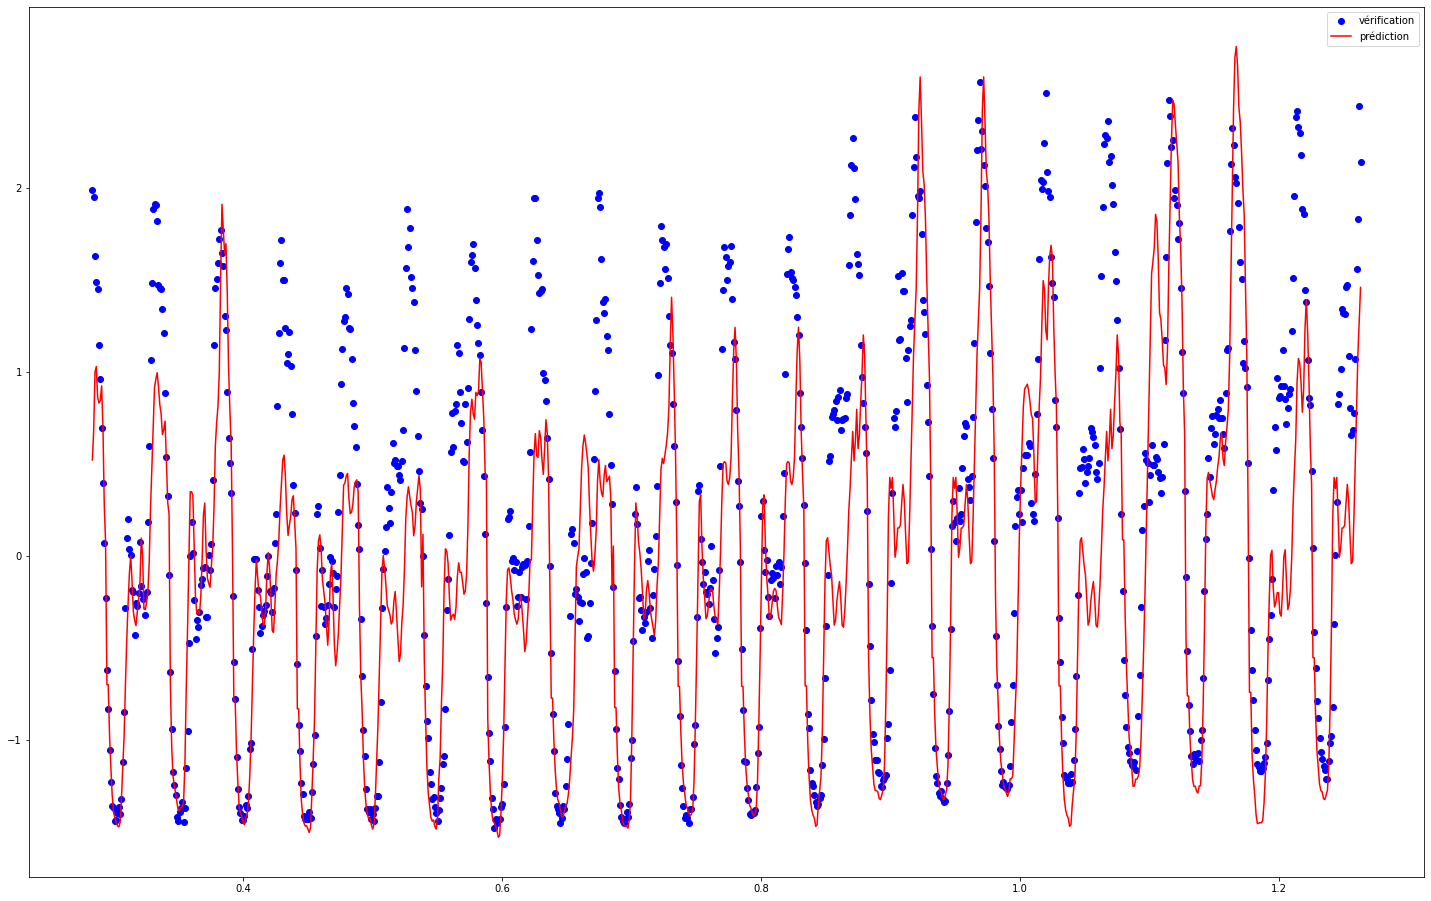

In [395]:
# Initialisation du modèle
model = KNeighborsRegressor(n_neighbors=2, weights='uniform')

#Entrainement du modèle
model.fit(X_train, y_train)
from sklearn.metrics import mean_squared_error
print(mean_squared_error(y_test,model.predict(X_test_pca)))


y_predicted = model.predict(X_test_pca)
X_test_time = [X_test[i][7] for i in range (len(X_test))]
#on trie les y par rapport aux X puis on affiche les données triées
for i in range(3):
    plt.cla()
    pas = 48*20
    plt.scatter(X_test_time[i*48*20:(i+1)*48*20], y_test[i*48*20:(i+1)*48*20], c="blue", label="vérification")
    plt.plot(X_test_time[i*48*20:(i+1)*48*20], y_predicted[i*48*20:(i+1)*48*20], c="red", label="prédiction")
    plt.legend()
    plt.gcf().set_size_inches(25, 16)

    plt.savefig('ACP' + str(i) + '.png')

#On trace la courbe des prédictions

#plt.scatter(X_test, y_test, color="blue", label="data")
#plt.plot(x_test['Time'][0:200], y_predicted[0:200], color="darkorange", label="data")